# Example

This example demonstrates detecting motion in a video file

### Step 1

We're going to use OpenCV to read the video file. First we create a simple utility function for displaying images from OpenCV:

In [1]:
import cv2
from PIL import Image
from IPython import display

def show(img):
    display.display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

### Step 2

Next we create the SequenceTracker. Given the video is relatively high resolution I've chosen a stride of 24 pixels and a window size of 96 pixels. A threshold of 12 seems to give fairly good results for this setup. 

In [2]:
from context import motiondetect as md
st = md.SequenceTracker(stride=24, w_size=96, threshold=12)

### Step 3

Process a few frames from the video and overlay the results so we can see if it is working. There is a little bit of noise, but it has successfully detected the car on the right and the two motorbikes on the left as well as the parked car on the left which is reversing to maneuver out of its space. The motorbike nearest the center is particularly challenging as there is quite a bit of movement in the traffic behind it.

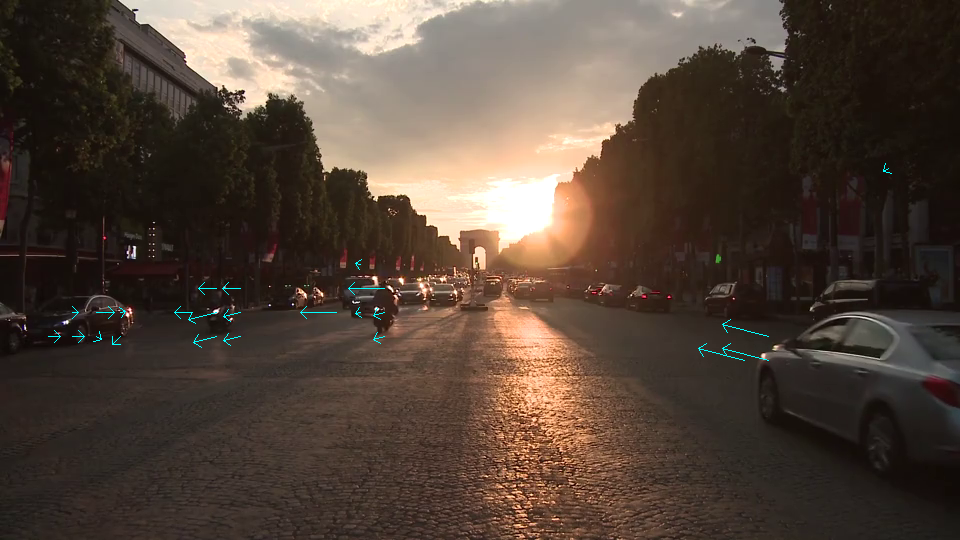

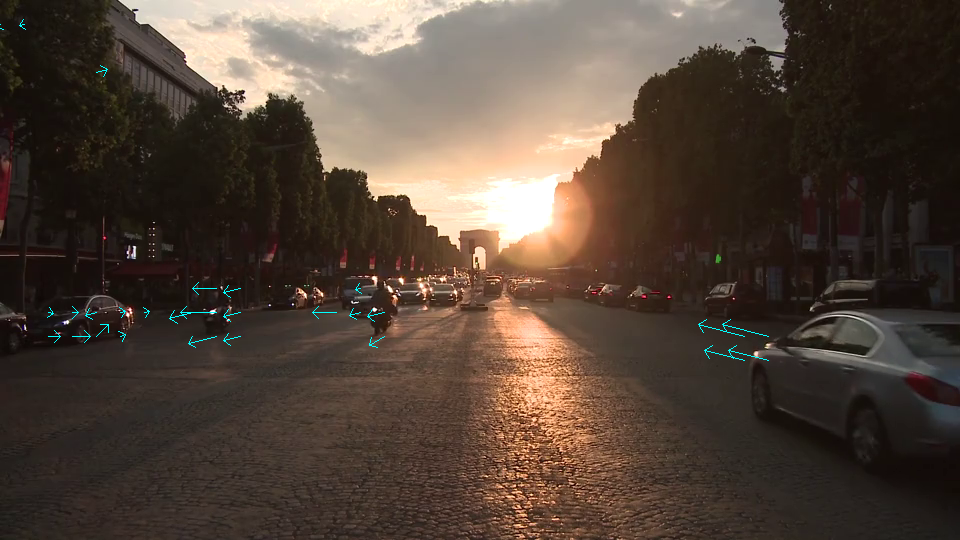

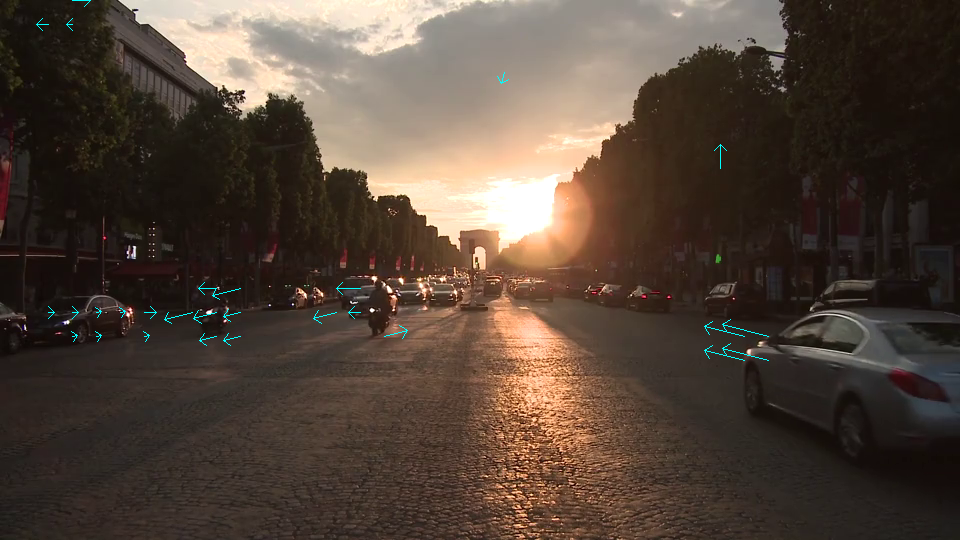

In [3]:
vid = cv2.VideoCapture('example.mov')

_, frame = vid.read()
d = st.next_frame(frame)

_, frame = vid.read()
d = st.next_frame(frame)
show(st.overlay(frame, d))

_, frame = vid.read()
d = st.next_frame(frame)
show(st.overlay(frame, d))

_, frame = vid.read()
d = st.next_frame(frame)
show(st.overlay(frame, d))

vid.release()